## Decision tree

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
seed =42

In [14]:
student_data = pd.DataFrame(dict(Cricket = ['Play'] * 15 + ['Not_play'] * 15,
     Gender = ['Male'] * 13 + ['Female'] * 2 + ['Male'] * 7 + ['Female'] * 8,
    Class = ['IX'] * 6 + ['X'] * 9 + ['IX'] * 9+ ['X'] * 6))
student_data.tail()

,Cricket,Gender,Class
25,Not_play,Female,X
26,Not_play,Female,X
27,Not_play,Female,X
28,Not_play,Female,X
29,Not_play,Female,X


In [15]:
student_data.describe()

,Cricket,Gender,Class
count,30,30,30
unique,2,2,2
top,Not_play,Male,X
freq,15,20,15


In [16]:
# encoder
le = LabelEncoder()
for i in student_data.columns:
    student_data[i]= le.fit_transform(student_data[i])
student_data.head()
X = student_data.drop('Cricket',axis=1)
y = student_data['Cricket']

## Decision tree using *Gini* criterion

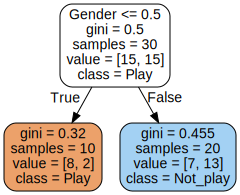

In [23]:
clf = DecisionTreeClassifier(criterion='gini',random_state=seed,max_depth=1)
clf.fit(X,y)
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names= student_data.columns[1:].values, 
                           class_names = ['Play','Not_play'],
                           rounded=True,filled=True)
graph = graphviz.Source(dot_data)
graph

In [6]:
gini_Gender = 1 - (15/30)**2 - (15/30)**2 # Gini For Gender Parent 

gini_female = 1- ((8/10)**2 + (2/10)**2 ) # Gini Female
gini_male = 1 - ((7/20)**2 + (13/20) **2) # Gini Male
Gini_index = 10/30 * gini_female + 2/3 * gini_male # Gini Index for Gender

print('gini_Gender',gini_Gender,'\ngini_female:',gini_female,'\ngini_male',gini_male,
     '\nGini_index',Gini_index)

gini_Gender 0.5 
gini_female: 0.31999999999999984 
gini_male 0.45499999999999996 
Gini_index 0.4099999999999999


In [7]:
# Gini for class attributes IX  play 6/14 class X 9/16
gini_class = 1 - (14/30)**2 - (16/30)**2 # Gini For Class

gini_IX = 1- ((6/14)**2 + (9/14)**2 ) # Gini IX
gini_X = 1 - ((9/16)**2 + (6/16) **2) # Gini X
Gini_index = 10/30 *  + 2/3 * .455  # Gini Index for Gender

print('gini_class',gini_class,'\ngini_IX:',gini_IX,'\ngini_IX',gini_IX,
     '\nGini_index',Gini_index)

gini_class 0.4977777777777777 
gini_IX: 0.40306122448979587 
gini_IX 0.40306122448979587 
Gini_index 0.10111111111111111


>Gini Index for **Gender** is > than Gini Index for **Class**. So Gender is condiser for root node split

### Decision tree without max depth restriction

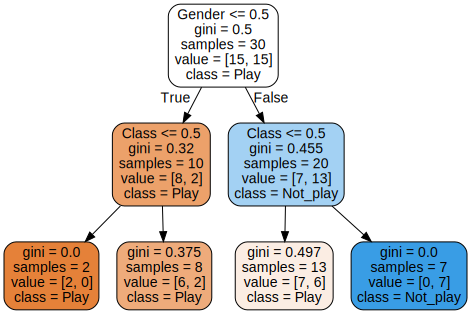

In [8]:
clf = DecisionTreeClassifier(criterion='gini',random_state=seed,max_depth=None)
clf.fit(X,y)
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names= student_data.columns[1:].values, 
                           class_names = ['Play','Not_play'],
                           rounded=True,filled=True)
graph = graphviz.Source(dot_data)
graph

***
## Decision tree using *Entropy* as criterion 

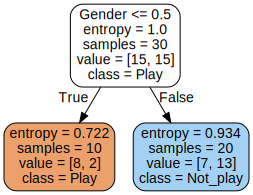

In [9]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=seed,max_depth=1)
clf.fit(X,y)
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names= student_data.columns[1:].values, 
                           class_names = ['Play','Not_play'],
                           rounded=True,filled=True)
graph = graphviz.Source(dot_data)
graph

In [10]:
#Entropy for Gender Female 10/30 and Male 20/30
H_female = -2/10 * np.log2(2/10) - 8/10 * np.log2(8/10) # H(F)
H_male = -7/20 * np.log2(7/20) - 13/20 * np.log2(13/20) # H(M)
H_Gender = -15/30* np.log2(15/30) -15/30* np.log2(15/30) # H(Gender)

# Weighted entropy
EH = 10/30 * H_female + 20/30 * H_male 

#Information Gain
I_gender = H_Gender - EH
print('H_female',H_female,'\nH_male',H_male,'\n\nH_Gender',H_Gender,'\nEH',EH,'\nI_gender',I_gender)

H_female 0.7219280948873623 
H_male 0.9340680553754911 

H_Gender 1.0 
EH 0.8633547352127815 
I_gender 0.1366452647872185


In [11]:
#Entropy for class attributes IX  play 6/14 class X 9/16
H_IX = -6/14 * np.log2(6/14) - 9/14 * np.log2(9/14) # H(IX)
H_X = - 9/16 *np.log2(9/16) - 6/16 * np.log2(6/16) # H(X)
H_Class = -15/30* np.log2(15/30) -15/30* np.log2(15/30) # H(Gender)

# Weighted entropy / Excepted entropy
EH = 10/30 * H_IX + 20/30 * H_X

#Information Gain
I_Class = H_Class - EH
print('H_IX',H_IX,'\nH_X',H_X,'\n\nH_Class',H_Class,'\nEH',EH,'\nI_Class',I_Class)

H_IX 0.933658843825451 
H_X 0.9975562489182658 

H_Class 1.0 
EH 0.9762571138873275 
I_Class 0.0237428861126725


> The Information Gain for **Gender** is > than Information gain for **Class**.

***
## Decision tree using *Variance reduction /MSE(Mean square error)* as criterion 

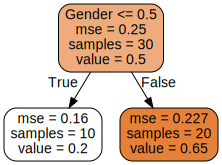

In [12]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=1,random_state=seed)
clf.fit(X,y)
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names= student_data.columns[1:].values, 
                           class_names = ['Play','Not_play'],
                           rounded=True,filled=True)
graph = graphviz.Source(dot_data)
graph

In [24]:
mse_cri = np.var(y)
mu_female = (1*2 + 0*8) /10
V_female = (1- mu_female)**2*2/10 + (0- mu_female)**2*8/10

mu_male = (1*13 + 0*7) /20
V_male = (1- mu_male)**2*13/20 + (0- mu_male)**2*7/20

# Reduction in variance
V_gender = 10/30 * V_female + 20/30 * V_male
mse_cri,V_gender

(0.25, 0.20500000000000002)

In [26]:
V_male

0.22750000000000004